# Data Join


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import os

# First Dataset text_emotion

In [59]:
def preprocess_text_emotion_data():
    """
    This function reads in the first dataset text_emotion, cleans the data,
    renames columns, performs label encoding, and drops missing values. 

    Returns:
    pandas.DataFrame: The preprocessed dataset.
    """

    # Load the data
    df = pd.read_csv('../data/text_emotion.csv')

    # Initial exploration
    df_clean = df.drop(['author', 'tweet_id'], axis=1)
    df_clean.rename(columns={'content': 'text', 'sentiment': 'label'}, inplace=True)

    # Check the data
    print(df_clean.head())
    print(df_clean.shape)
    print(df_clean['label'].value_counts())
    

    df_clean['label'].value_counts().plot(rot=0, kind='barh', color='green')
    plt.show()

    # Map labels to integers
    label_map = {
        'sadness': 0,
        'empty': 0,
        'joy': 1,
        'happiness': 1,
        'fun': 1,
        'enthusiasm': 1,
        'relief': 1,
        'love': 2,
        'anger': 3,
        'hate': 3,
        'fear': 4,
        'worry': 4,
        'surprise': 5,
        'neutral': 6,
        'boredom': 6
    }
    df_clean['label'] = df_clean['label'].replace(label_map)

    # Check the data
    print(df_clean.head())
    print(df_clean['label'].tolist())
    plt.hist(df_clean['label'].tolist(), bins=7)
    plt.show()

    # Drop NA
    df_clean.dropna(inplace=True)
    print(df_clean.shape)
    print(df_clean.head())

    return df_clean

In [60]:
def plot_label_histogram(df: pd.DataFrame) -> None:
    """
    Plots a histogram of the label column of a given DataFrame.

    Parameters
    ----------
    df : pd.DataFrame
        The DataFrame to plot the histogram of.

    Returns
    -------
    None

    """
    # Get the list of labels
    label_list = df['label'].tolist()

    # Plot the histogram
    plt.hist(label_list, bins=7)
    plt.show()

        label                                               text
0       empty  @tiffanylue i know  i was listenin to bad habi...
1     sadness  Layin n bed with a headache  ughhhh...waitin o...
2     sadness                Funeral ceremony...gloomy friday...
3  enthusiasm               wants to hang out with friends SOON!
4     neutral  @dannycastillo We want to trade with someone w...
(40000, 2)
neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: label, dtype: int64


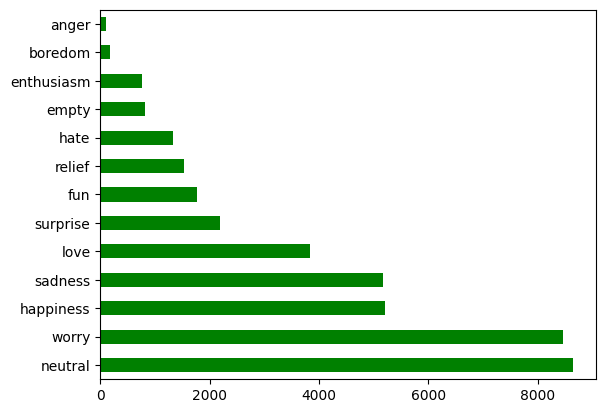

   label                                               text
0      0  @tiffanylue i know  i was listenin to bad habi...
1      0  Layin n bed with a headache  ughhhh...waitin o...
2      0                Funeral ceremony...gloomy friday...
3      1               wants to hang out with friends SOON!
4      6  @dannycastillo We want to trade with someone w...
[0, 0, 0, 1, 6, 4, 0, 4, 0, 0, 6, 4, 0, 0, 5, 0, 2, 0, 4, 0, 4, 1, 6, 4, 0, 4, 0, 4, 0, 4, 3, 6, 6, 6, 6, 6, 0, 4, 6, 6, 1, 1, 4, 4, 0, 4, 4, 0, 6, 6, 6, 4, 0, 6, 6, 4, 1, 6, 6, 0, 4, 0, 0, 0, 0, 6, 4, 0, 4, 1, 6, 4, 6, 6, 4, 6, 6, 1, 4, 4, 0, 6, 0, 4, 0, 4, 3, 4, 4, 4, 6, 6, 4, 6, 2, 0, 0, 0, 6, 3, 4, 3, 6, 0, 4, 3, 0, 3, 4, 0, 4, 6, 6, 6, 6, 6, 0, 6, 6, 0, 6, 3, 2, 4, 3, 0, 1, 0, 6, 4, 6, 2, 0, 6, 6, 0, 0, 6, 6, 4, 6, 0, 6, 4, 6, 4, 6, 1, 1, 6, 0, 2, 4, 4, 4, 4, 6, 4, 4, 4, 3, 4, 0, 0, 5, 1, 0, 4, 0, 6, 4, 0, 4, 0, 0, 6, 6, 4, 6, 1, 0, 6, 1, 0, 4, 0, 0, 4, 4, 5, 5, 0, 5, 0, 5, 4, 3, 4, 1, 4, 0, 4, 0, 0, 0, 6, 3, 6, 6, 3, 2, 0, 3, 

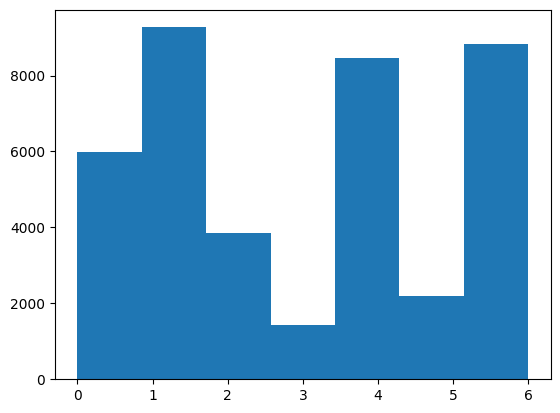

(40000, 2)
   label                                               text
0      0  @tiffanylue i know  i was listenin to bad habi...
1      0  Layin n bed with a headache  ughhhh...waitin o...
2      0                Funeral ceremony...gloomy friday...
3      1               wants to hang out with friends SOON!
4      6  @dannycastillo We want to trade with someone w...


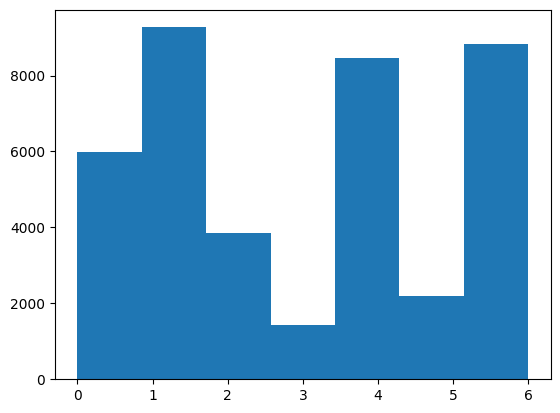

In [61]:
df_1 = preprocess_text_emotion_data()
plot_label_histogram(df_1)

# Second dataset training

In [62]:
def preprocess_training_data():
    """
    This function reads in the send dataset training dropping rows with missing values.

    Returns:
    pandas.DataFrame: The cleaned DataFrame with missing rows removed.

    """
    df_clean_2 = pd.read_csv('../data/training.csv')
    
    df_clean_2.dropna(inplace=True)
    return df_clean_2

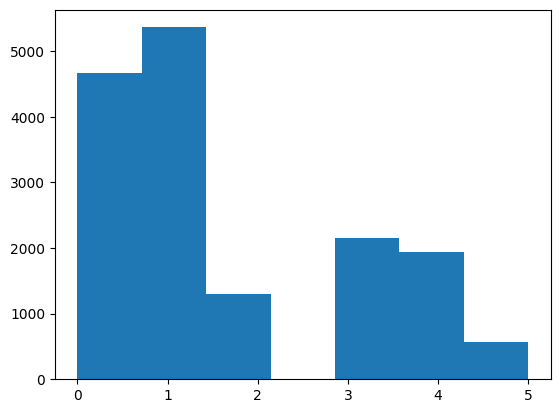

In [63]:
df_2 = preprocess_training_data()
plot_label_histogram(df_2)

# Third dataset train_sent_emo

In [64]:
def preprocess_text_sent_emo_data():
    """
    This function reads in the third dataset train_sent_emo, cleans the data,
    renames columns, performs label encoding, and drops missing values. 

    Returns:
    pandas.DataFrame: The preprocessed dataset.
    """
    
    # Read in the data
    df_3 = pd.read_csv('../data/train_sent_emo.csv')
    
    # Clean the data
    df_clean_3 = df_3.drop(['Sr No.', 'Speaker','Sentiment','Dialogue_ID','Utterance_ID','Season','Episode','StartTime','EndTime'], axis=1)
    df_clean_3 = df_clean_3.rename(columns={'Utterance': 'text', 'Emotion': 'label'})
    
    # Perform label encoding
    label_map = {'sadness': 0, 'empty': 0, 'joy': 1, 'happiness': 1, 'fun': 1, 'enthusiasm': 1, 'relief': 1, 
                 'love': 2, 'anger': 3, 'hate': 3, 'disgust': 3, 'fear': 4, 'worry': 4, 'surprise': 5, 
                 'neutral': 6, 'boredom': 6}
    df_clean_3['label'] = df_clean_3['label'].replace(label_map)
    
    # Drop missing values
    df_clean_3 = df_clean_3.dropna()
    
    return df_clean_3

In [65]:
def plot_label_counts(label_dict):
    """
    This function takes in a dictionary of label counts and plots a horizontal bar chart.

    Parameters:
    dict: The dictionary of label counts.
    """
    
    fig, ax = plt.subplots()
    ax.barh(list(label_dict.keys()), list(label_dict.values()), color='green')
    ax.set_title('All labels')
    ax.set_xlabel('Count')
    plt.show()

In [66]:
def join_datasets(df_1,df_2,df_3):
    """
    This function joins the three cleaned datasets, and creates a dictionary of label counts.
    
    Parameters:
    pandas.DataFrame: The first dataset to be joined.
    pandas.DataFrame: The second dataset to be joined.
    pandas.DataFrame: The third dataset to be joined.

    Returns:
    pandas.DataFrame: The joined dataset.
    dict: The dictionary of label counts.
    """
    
    # Join datasets
    df_joined = pd.concat([df_1, df_2, df_3], ignore_index=True)
    
    # Create a dictionary of label counts
    label_list_clean = df_joined['label'].tolist()
    label_counts = [label_list_clean.count(0), label_list_clean.count(1), label_list_clean.count(2), 
                    label_list_clean.count(3), label_list_clean.count(4), label_list_clean.count(5), 
                    label_list_clean.count(6)]
    
    label_dict = dict(zip(['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise', 'Neutral'], label_counts))

    return df_joined, label_dict

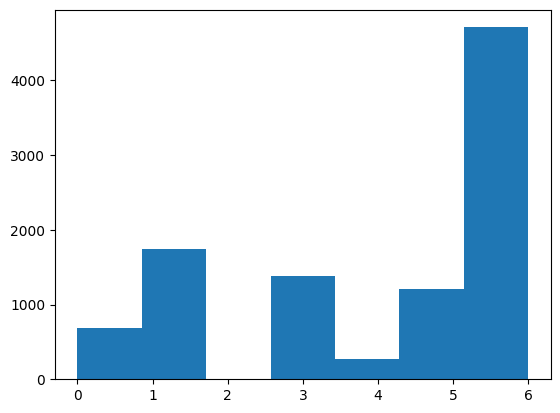

In [67]:
df_3 =  preprocess_text_sent_emo_data()
plot_label_histogram(df_3)

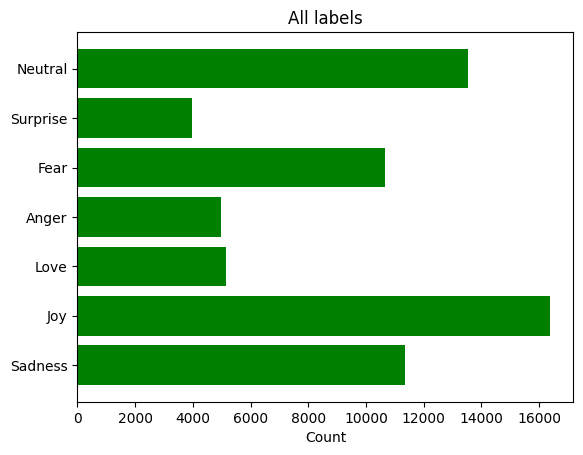

In [68]:
joined_data,label_dict = join_datasets(df_1,df_2,df_3)
plot_label_counts(label_dict)

# Outfile with datasets concatenated

In [69]:
# from pathlib import Path

# filepath = Path('../data/cleaned/out.csv')
# filepath.parent.mkdir(parents=True, exist_ok=True)
# df_clean.to_csv(filepath, index=False)

In [70]:
# Read in the data
# df_clean_imp = pd.read_csv('../data/cleaned/out.csv')
# df_clean_imp.head()
# df_clean_imp.shape

# Audio processing

## Segment Determination

In [71]:
def obtener_duraciones(ruta:str, carpetas:list) -> list:
    """
    Receives a path and a list of folders. For each folder, it gets the duration of every .wav 
    file it finds in it and returns a list of all the durations obtained
    
    :param ruta: The path where the folders with the audio files are located
    :type ruta: str
    :param carpetas: The list of folders to be processed.
    :type carpetas: list
    :return: The list with the obtained durations.
    :rtype: list
    """
    
    duraciones = []
    
    for carpeta in carpetas:
        carpeta_ruta = os.path.join(ruta, carpeta)
        archivos = os.listdir(carpeta_ruta)

        for archivo in archivos:
            archivo_ruta = os.path.join(carpeta_ruta, archivo)
            if(".wav" in archivo_ruta):
                duracion = librosa.get_duration(path=archivo_ruta)
                duraciones.append(duracion)
                
    return duraciones



In [72]:
ruta = '../data/audios/'
carpetas = ['train', 'test', 'validation']
duraciones = obtener_duraciones(ruta,carpetas)
print(len(duraciones)," audios were found")

1102  audios were found



## Distribution and segment duration determination

In [73]:
def graficar_distribucion(duraciones:list) -> float:
    """
    Receives a list of durations and plots their distribution using a Seaborn kernel density plot.
    Also, calculates the value of the duration of the segments.
    
    :param duraciones: The list of durations to plot.
    :type duraciones: list
    :return: The minimum duration for the creation of the segments
    :rtype: list
    """
    audios_sorted = sorted(duraciones)
    duracion_max = audios_sorted[-1]
    pct_per_duracion = []
    for i in range(int(duracion_max)+1):
        pct_per_duracion.append(sum(d >= i for d in audios_sorted) / len(audios_sorted) * 100)
    fig, ax = plt.subplots()
    ax.plot(np.arange(duracion_max), pct_per_duracion)
    minima= np.percentile(audios_sorted, 5)
    ax.set(xlabel='Duración (segundos)', ylabel='Porcentaje de audios',
           title='Distribución de duraciones')
    ax.axhline(y=95, color='r', linestyle='--')
    ax.axvline(x=minima, color='g', linestyle='--')
    plt.show()
    print("El 95% de los datos sobrepasa los ",minima," segundos")
    return minima

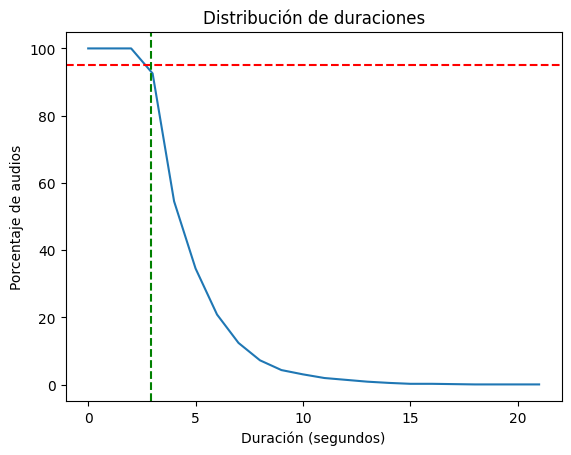

El 95% de los datos sobrepasa los  2.9358730158730157  segundos


In [74]:
minima=graficar_distribucion(duraciones)

## Features extraction

In [75]:
def extract_audio_features(carpetas, ruta, minima):
    """
    Extracts audio features from .wav files in a list of folders and returns them as numpy arrays.
    
    :param carpetas: List of folders where the .wav files are located.
    :type carpetas: list
    :param ruta: Path of the parent directory containing the folders.
    :type ruta: str
    :param minima: Minimum duration (in seconds) required for a segment to be considered.
    :type minima: float
    :return: A tuple containing numpy arrays of extracted MFCCs, STFT magnitudes, Mel spectrograms, and chroma features.
    :rtype: tuple
    """
    mfccs = []
    DFTs = []
    mel = []
    chromas = []
    
    for carpeta in carpetas:
        carpeta_ruta = os.path.join(ruta, carpeta)
        archivos = os.listdir(carpeta_ruta)

        for archivo in archivos:
            archivo_ruta = os.path.join(carpeta_ruta, archivo)
            if(".wav" in archivo_ruta):
                audio, sr = librosa.load(path=archivo_ruta)

                duracion = librosa.get_duration(y=audio, sr=sr)
                if duracion < minima:
                    continue

                #Segment creation
                inicio_ventana = librosa.time_to_samples(duracion / 2 - minima / 2, sr=sr)
                fin_ventana = librosa.time_to_samples(duracion / 2 + minima / 2, sr=sr)
                ventana = audio[inicio_ventana:fin_ventana]
                y = ventana

                #Lists are filled
                mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
                D = librosa.stft(y)
                magnitude, _ = librosa.magphase(D)
                magnitude_db = librosa.amplitude_to_db(magnitude)
                S = librosa.feature.melspectrogram(y=y, sr=sr)
                hop_length = 512
                chroma = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=hop_length)

                mfccs.append(mfcc)
                DFTs.append(magnitude_db)
                mel.append(S)
                chromas.append(chroma)

    mfccs = np.array(mfccs)
    DFTs = np.array(DFTs)
    mel = np.array(mel)
    chromas = np.array(chromas)

    return mfccs, DFTs, mel, chromas

In [76]:
mfccs,DFTs,mel,chromas = extract_audio_features(carpetas,ruta,minima)

## Features

In [77]:


def show_features(feature_array, x_axis='', y_axis='', title='', colorbar=True, cbar_format=""):
    """
    Displays the features using librosa.display.specshow().
    
    :param feature_array: A numpy array containing the feature.
    :type feature_array: numpy.ndarray
    :param x_axis: The type of x-axis to use.
    :type x_axis: str, optional
    :param y_axis: The type of y-axis to use.
    :type y_axis: str, optional
    :param title: The title of the plot.
    :type title: str, optional
    :param colorbar: Whether to display a colorbar or not.
    :type colorbar: bool, optional
    :param cbar_format: The format string for the colorbar ticks.
    :type cbar_format: str, optional
    :return: None
    """
    for i in range(5):
        fig, ax = plt.subplots()
        if y_axis != '':
            img = librosa.display.specshow(feature_array[i], x_axis=x_axis, y_axis=y_axis)
        else:
            img = librosa.display.specshow(feature_array[i], x_axis=x_axis)
        ax.set_title(title)
        if colorbar:
            fig.colorbar(img, ax=ax, format=cbar_format)

## MFCC

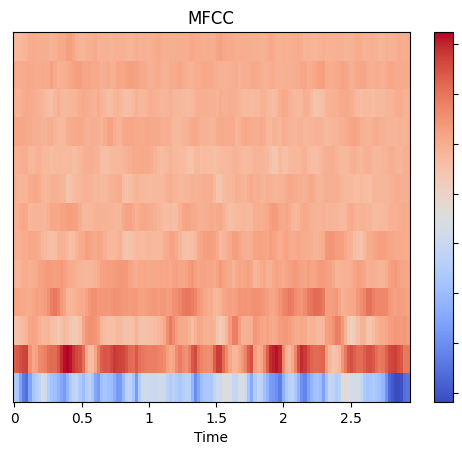

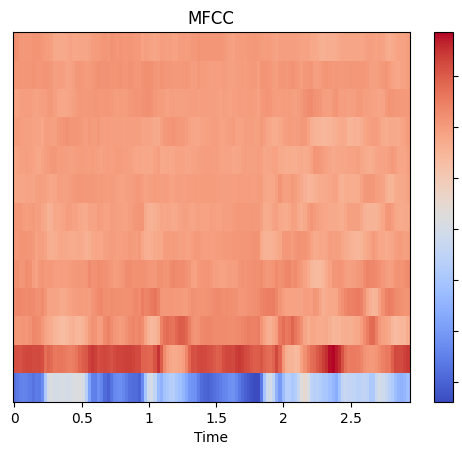

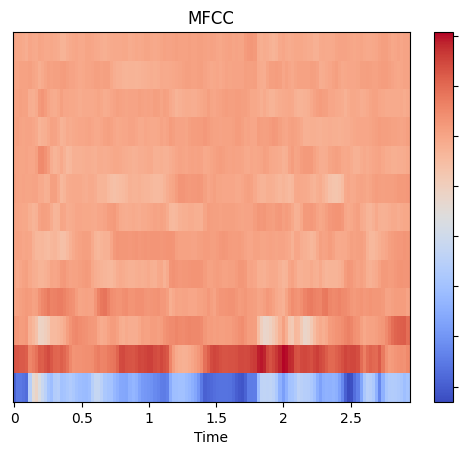

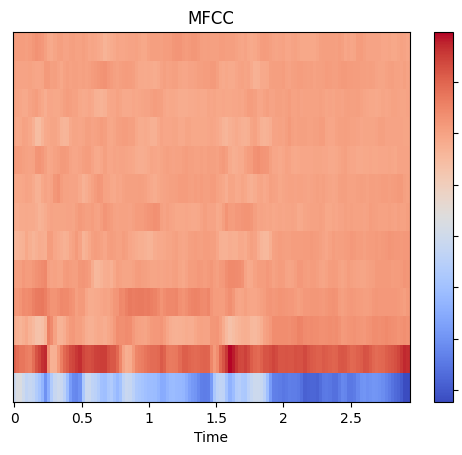

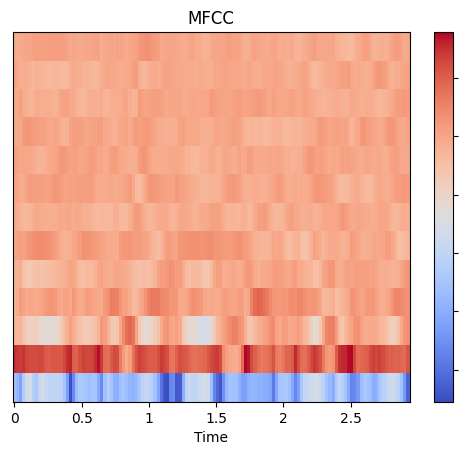

In [78]:
show_features(mfccs, x_axis='time', y_axis='', title='MFCC')

## DFT

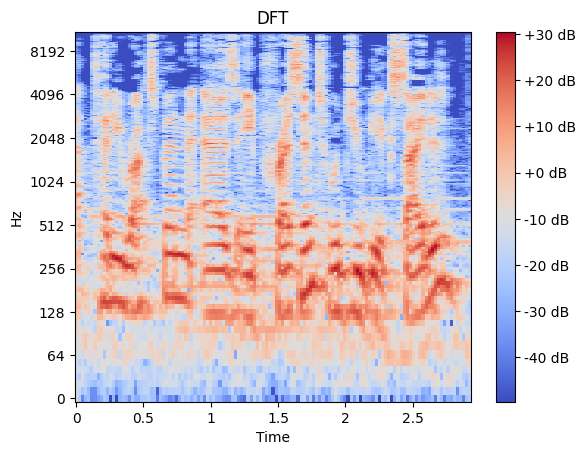

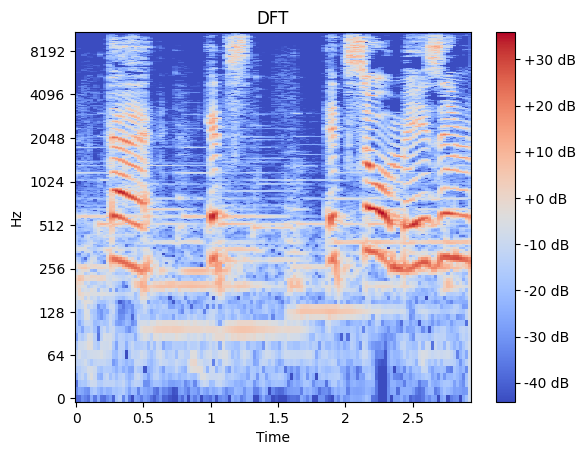

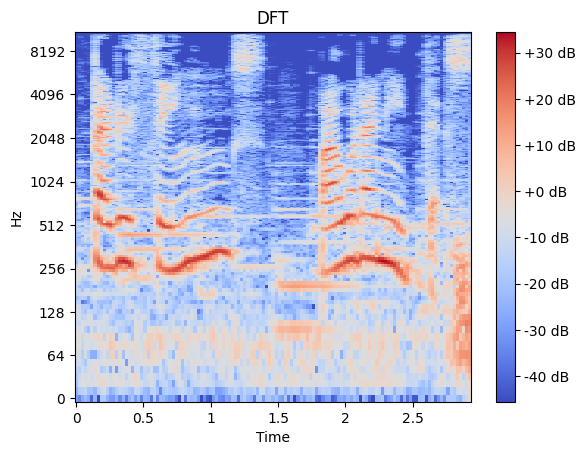

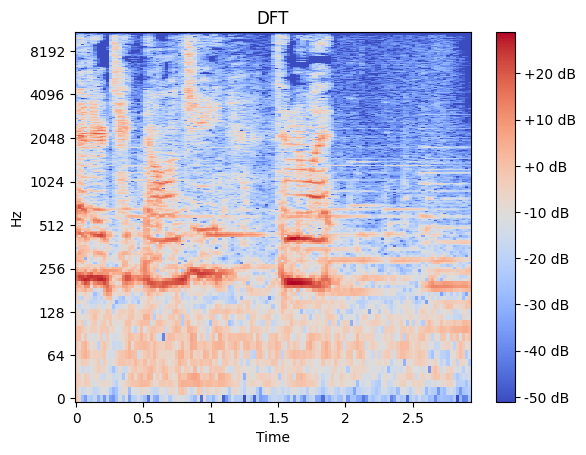

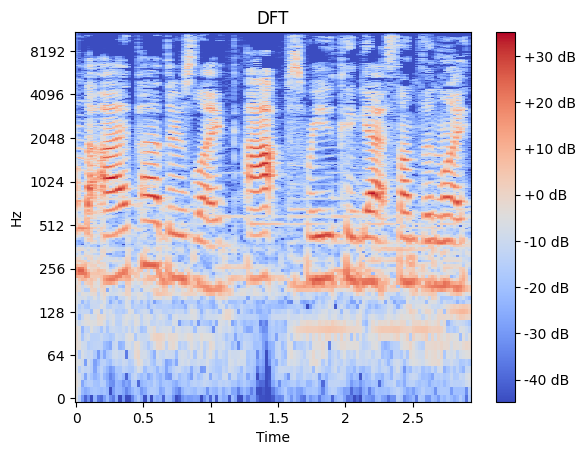

In [79]:
show_features(DFTs, x_axis='time', y_axis='log', title='DFT',cbar_format="%+2.0f dB")

## Mel spectogram

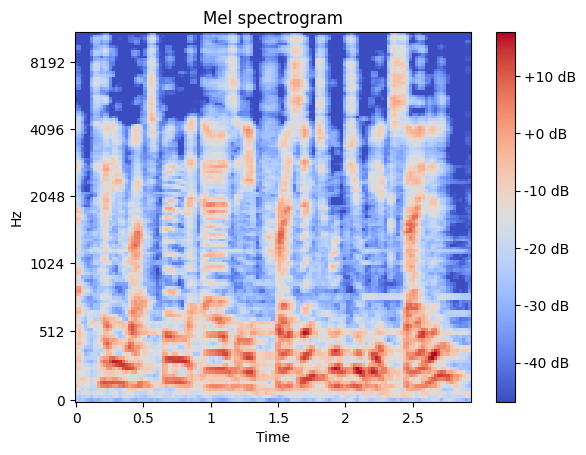

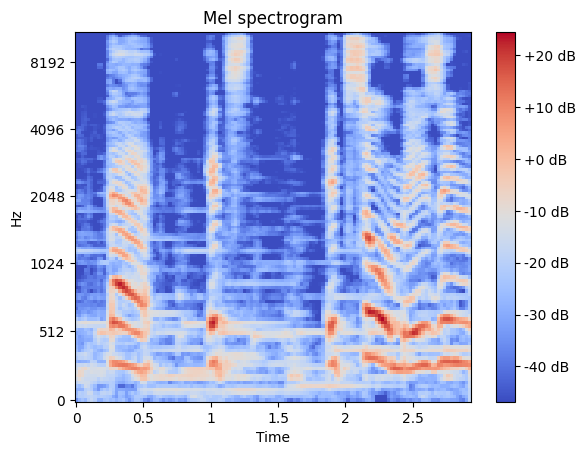

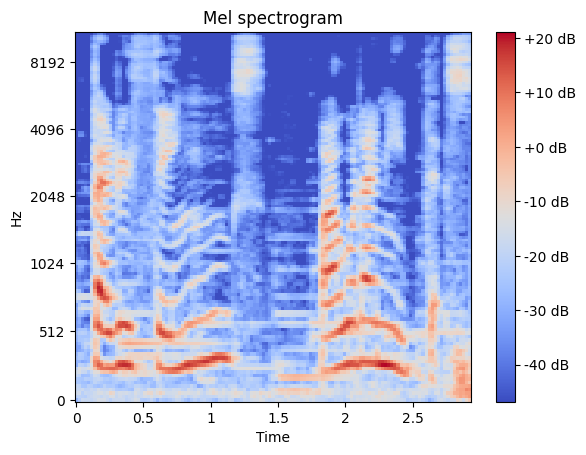

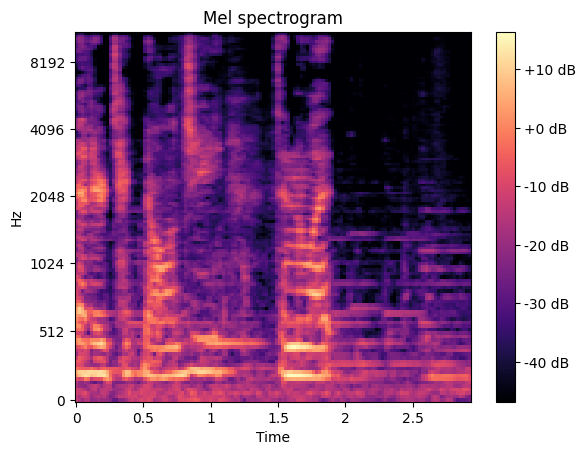

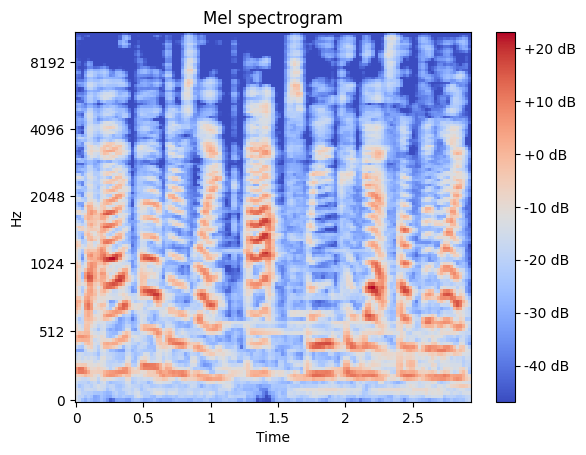

In [80]:
show_features(librosa.power_to_db(mel), y_axis='mel', x_axis='time', title='Mel spectrogram',cbar_format="%+2.0f dB")

## Chromagram

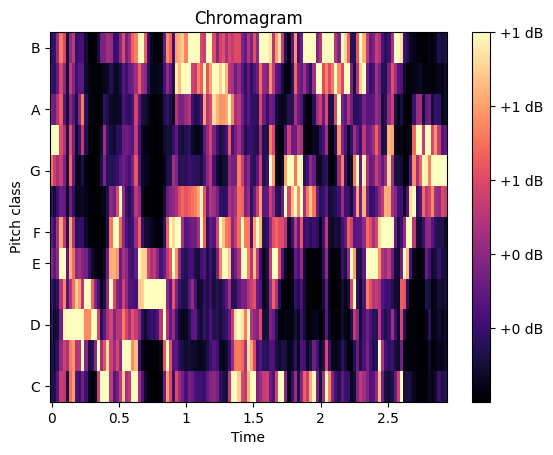

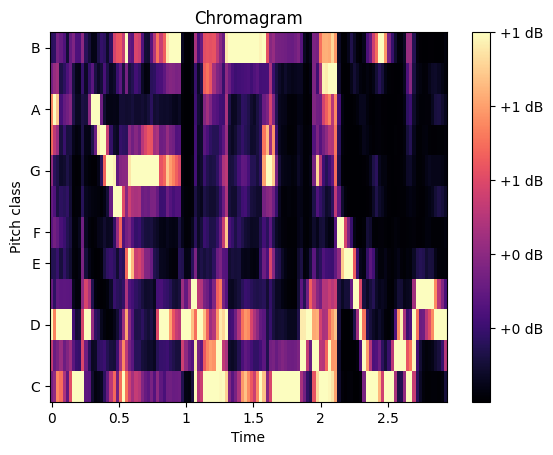

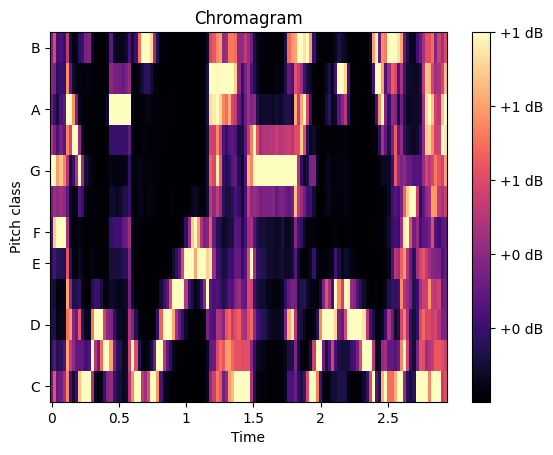

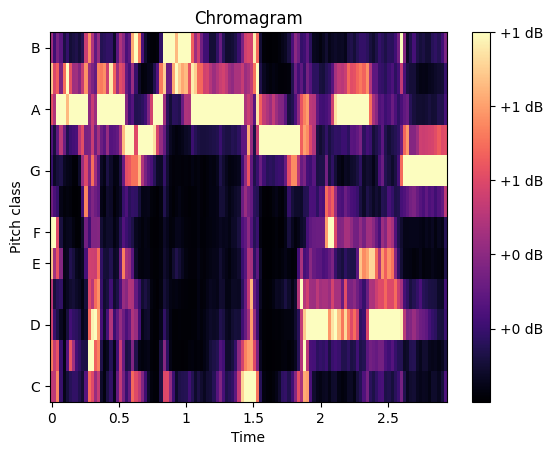

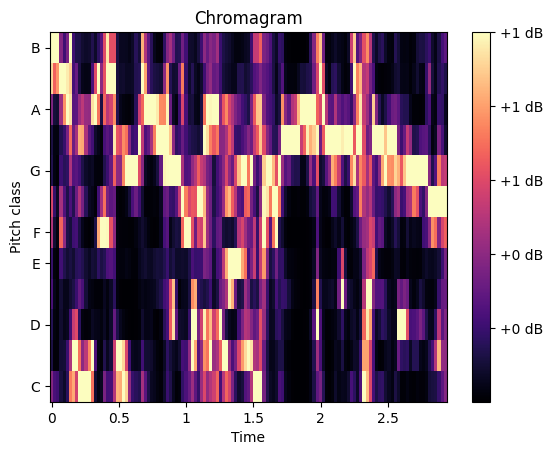

In [81]:
show_features(chromas, y_axis='chroma', x_axis='time', title='Chromagram',cbar_format="%+2.0f dB")